<a href="https://colab.research.google.com/github/Kirito6942O/pythonAssignment1/blob/main/2408877_Rochak_Maharjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Assignment1

/content/drive/MyDrive/Assignment1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!ls

2408877_Rochak_Maharjan.ipynb  south_asia_happiness.csv
middle_east_dataset.csv        worldhappynessresort.csv


In [10]:
df = pd.read_csv("worldhappynessresort.csv")

In [11]:
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [12]:
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(143, 9)


In [ ]:
print("\nColumns and their data types:")
print(df.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
print("Basic Statistics for 'Score' column:")
print(f"Mean: {df['score'].mean():.2f}")
print(f"Median: {df['score'].median():.2f}")
print(f"Standard Deviation: {df['score'].std():.2f}")

Basic Statistics for 'Score' column:
Mean: 5.53
Median: 5.79
Standard Deviation: 1.17


In [ ]:
highest_score_country = df.loc[df['score'].idxmax()]
lowest_score_country = df.loc[df['score'].idxmin()]

print("Country with the highest happiness score is: ")
print(highest_score_country[['Country name', 'score']])
print("\nCountry with the lowest happiness score:")
print(lowest_score_country[['Country name', 'score']])

Country with the highest happiness score is: 
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with the lowest happiness score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


In [15]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [16]:
filtered_df = df[df['score'] > 7.5]
print("Countries with a Score greater than 7.5:")
print(filtered_df)

Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [17]:
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Top 10 rows sorted by GDP per Capita:")
print(sorted_df)

Top 10 rows sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [18]:
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nDataFrame with new 'Happiness Category' column:")
print(df[['Country name', 'score', 'Happiness Category']].head(143))


DataFrame with new 'Happiness Category' column:
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


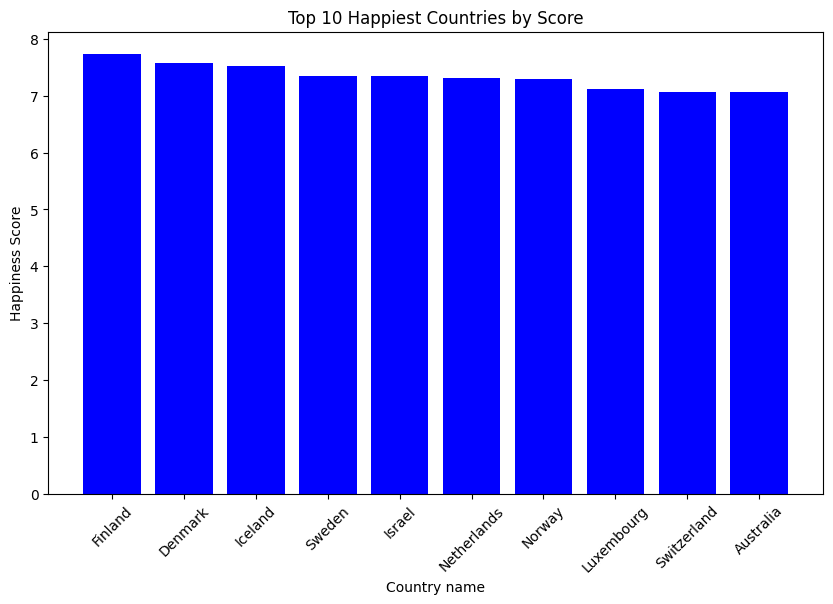

In [19]:
top10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.bar(top10_happiest['Country name'], top10_happiest['score'], color='blue')
plt.title("Top 10 Happiest Countries by Score")
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.xlabel("Country name")
plt.show()

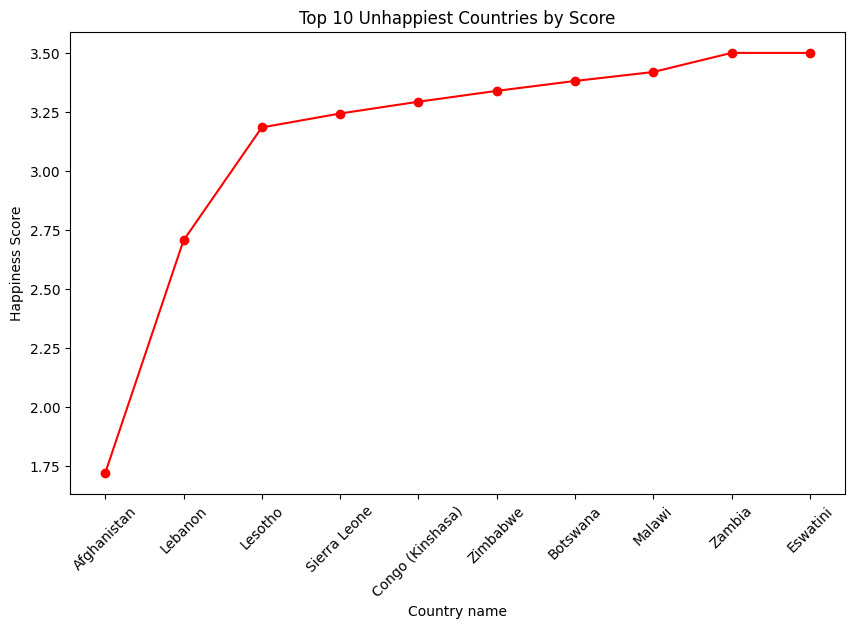

In [20]:
# Step 10.2: Line Plot - Top 10 unhappiest countries
top10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top10_unhappiest['Country name'], top10_unhappiest['score'], marker='o', color='red')
plt.title("Top 10 Unhappiest Countries by Score")
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.xlabel("Country name")
plt.show()

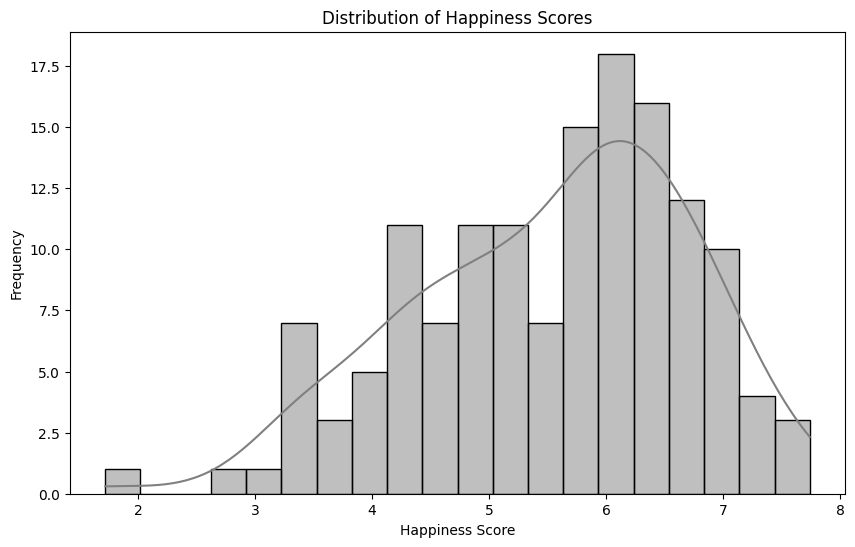

The histogram shows the distribution of happiness scores across all countries. 
It allows us to see if the scores are normally distributed, skewed, or concentrated in a particular range.


In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='gray')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

print("The histogram shows the distribution of happiness scores across all countries. \nIt allows us to see if the scores are normally distributed, skewed, or concentrated in a particular range.")

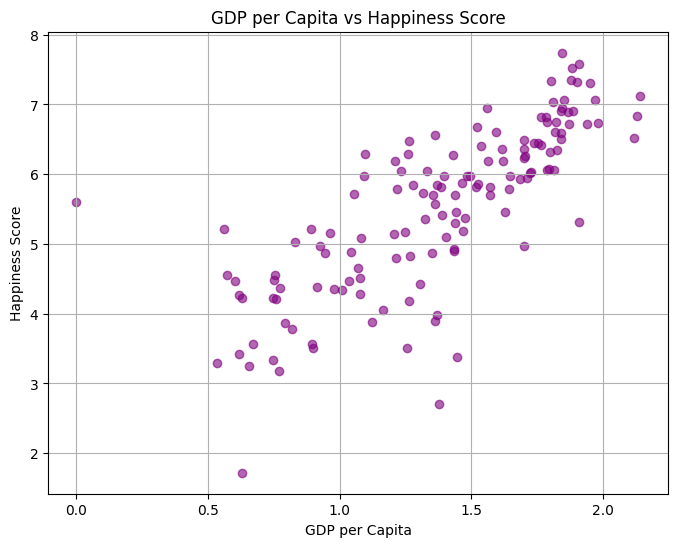

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='purple', alpha=0.6)
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.show()

In [23]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Srilanka"
]

In [24]:
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

In [25]:
south_asia_df.to_csv('south_asia_happiness.csv', index=False)
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [29]:
south_asia_df.loc[:, 'Composite Score'] = 0.40 * south_asia_df['Log GDP per capita'] + \
                                            0.30 * south_asia_df['Social support'] + \
                                            0.30 * south_asia_df['Healthy life expectancy']


In [30]:
south_asia_df.loc[:,'Composite Rank'] = south_asia_df['Composite Score'].rank(ascending=False)

In [33]:
sorted_composite_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
sorted_composite_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,Composite Rank
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,1.0
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.0
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.0
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,4.0
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,5.0


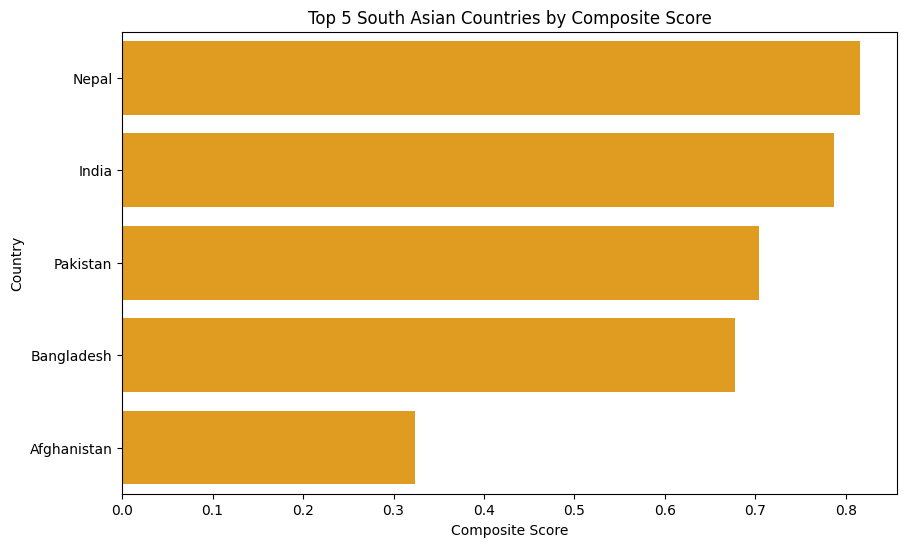

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=sorted_composite_df.head(5), color='orange')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()


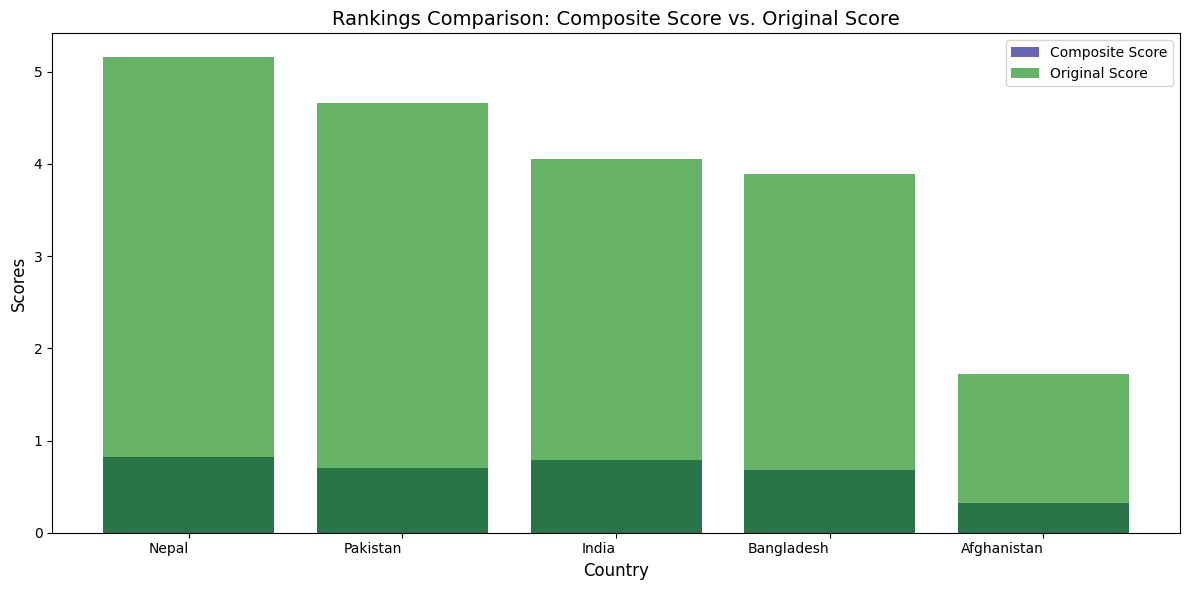

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(south_asia_df['Country name'], south_asia_df['Composite Score'], alpha=0.6, label='Composite Score', color='navy')
plt.bar(south_asia_df['Country name'], south_asia_df['score'], alpha=0.6, label='Original Score', color='green')

plt.title('Rankings Comparison: Composite Score vs. Original Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [35]:

Q1_score = south_asia_df['score'].quantile(0.25)
Q3_score = south_asia_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

score_outliers = south_asia_df[
    (south_asia_df['score'] < (Q1_score - 1.5 * IQR_score)) |
    (south_asia_df['score'] > (Q3_score + 1.5 * IQR_score))
]

gdp_outliers = south_asia_df[
    (south_asia_df['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) |
    (south_asia_df['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))
]

print("Outliers based on Score:")
print(score_outliers[['Country name', 'score']])

print("\nOutliers based on GDP per Capita:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])


Outliers based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


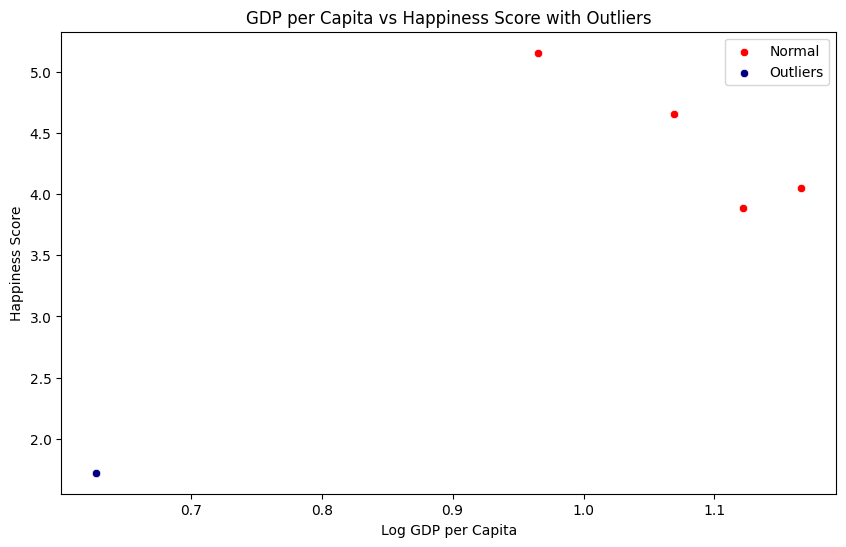

In [36]:
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='red', label='Normal')
sns.scatterplot(x=combined_outliers['Log GDP per capita'], y=combined_outliers['score'], color='navy', label='Outliers')
plt.title("GDP per Capita vs Happiness Score with Outliers")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

In [37]:
corr_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
corr_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'])


In [38]:
print(f"{corr_freedom:.2f}")


0.80


In [39]:
print(f"{corr_generosity:.2f}")

0.88


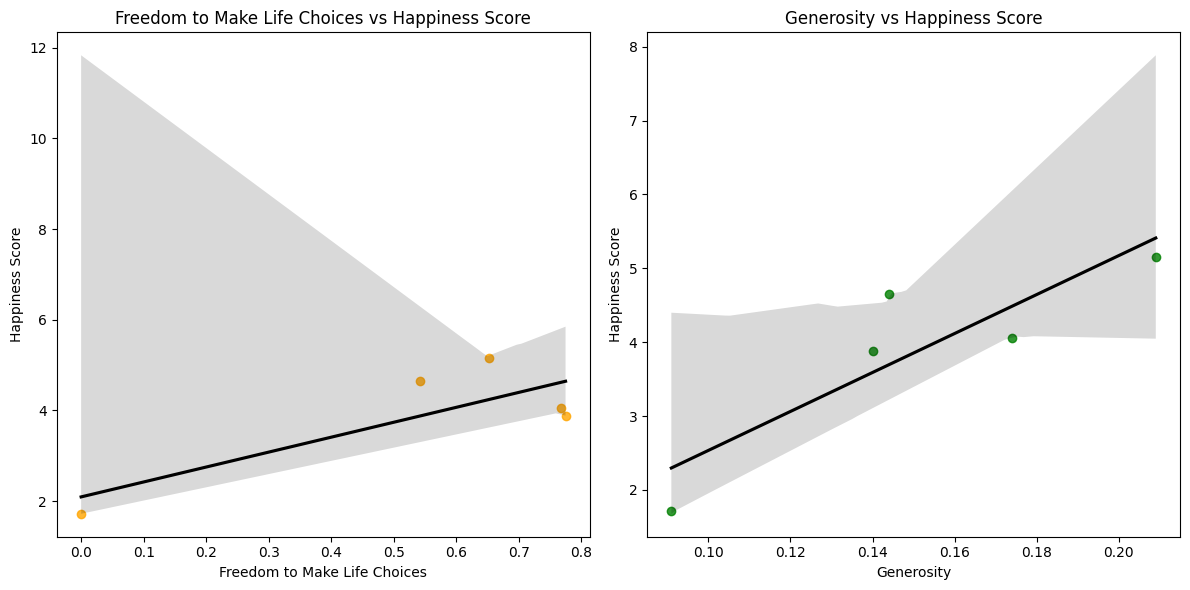

In [40]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color':'green'}, line_kws={'color':'black'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

In [43]:
if corr_freedom > corr_generosity:
    print("\nThe strongest correlation is between Freedom to Make Life Choices and Happiness Score.")
    print("This suggests that countries with more freedom tend to have a higher happiness score.")
else:
    print("\nThe strongest correlation is between Generosity and Happiness Score.")
    print("This suggests that countries with higher generosity tend to have a higher happiness score.")

if abs(corr_freedom) < abs(corr_generosity):
    print("The weakest correlation is between Freedom to Make Life Choices and Happiness Score.")
else:
    print("The weakest correlation is between Generosity and Happiness Score.")


The strongest correlation is between Generosity and Happiness Score.
This suggests that countries with higher generosity tend to have a higher happiness score.
The weakest correlation is between Freedom to Make Life Choices and Happiness Score.


In [45]:
south_asia_df.loc[:, 'GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


In [46]:
ranked_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
ranked_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

In [47]:
ranked_ascending

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,Composite Rank,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,1.0,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.0,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.0,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,4.0,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,5.0,-1.093


In [48]:
ranked_descending

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,Composite Rank,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,5.0,-1.093
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,4.0,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.0,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.0,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,1.0,-4.193


In [49]:
top_3_positive = ranked_descending.head(3)
top_3_negative = ranked_ascending.head(3)
top_gaps = pd.concat([top_3_positive, top_3_negative])

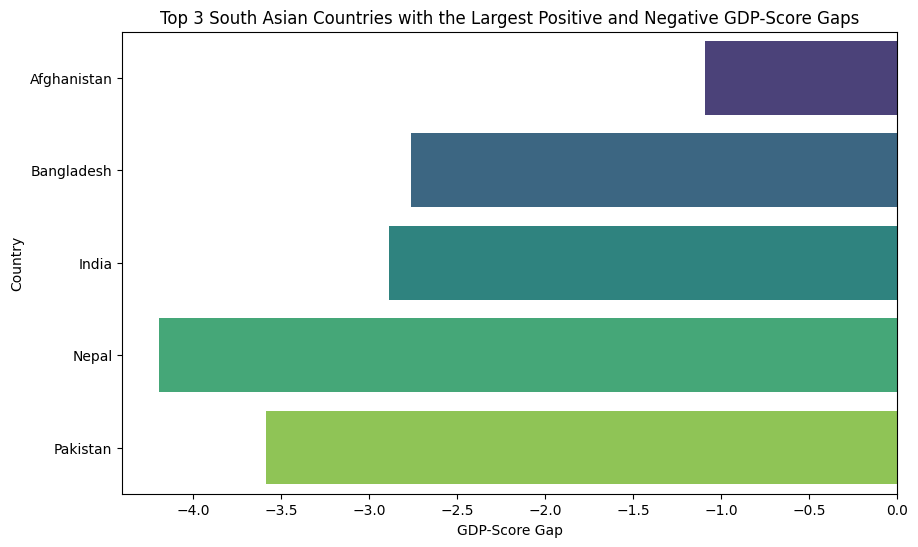

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps, hue='Country name', dodge=False, palette='viridis', legend=False)
plt.title("Top 3 South Asian Countries with the Largest Positive and Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.show()


In [51]:
print("Top 3 Positive GDP-Score Gaps:")
print(top_3_positive[['Country name', 'GDP-Score Gap', 'Log GDP per capita', 'score']])

print("\nTop 3 Negative GDP-Score Gaps:")
print(top_3_negative[['Country name', 'GDP-Score Gap', 'Log GDP per capita', 'score']])

Top 3 Positive GDP-Score Gaps:
    Country name  GDP-Score Gap  Log GDP per capita  score
142  Afghanistan         -1.093               0.628  1.721
128   Bangladesh         -2.764               1.122  3.886
125        India         -2.888               1.166  4.054

Top 3 Negative GDP-Score Gaps:
    Country name  GDP-Score Gap  Log GDP per capita  score
92         Nepal         -4.193               0.965  5.158
107     Pakistan         -3.588               1.069  4.657
125        India         -2.888               1.166  4.054


In [52]:
print("Analysis:")
print("""
1. Countries with a large positive gap have a significantly higher GDP per Capita compared to their Score.
   This suggests that economic wealth does not necessarily translate to higher happiness.
2. Countries with a large negative gap have relatively lower GDP per Capita but still maintain a higher happiness score.
   This indicates that factors other than GDP, such as social support and freedom, may be influencing happiness.
3. Understanding these gaps helps policymakers identify areas where economic growth might not be directly improving well-being.
""")

Analysis:

1. Countries with a large positive gap have a significantly higher GDP per Capita compared to their Score.
   This suggests that economic wealth does not necessarily translate to higher happiness.
2. Countries with a large negative gap have relatively lower GDP per Capita but still maintain a higher happiness score.
   This indicates that factors other than GDP, such as social support and freedom, may be influencing happiness.
3. Understanding these gaps helps policymakers identify areas where economic growth might not be directly improving well-being.



In [53]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
                         "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                         "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)].copy()

middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [54]:
output_file = 'middle_east_dataset.csv'
middle_east_df.to_csv(output_file, index=False)
print(f"\nMiddle Eastern dataset saved as '{output_file}'.")


Middle Eastern dataset saved as 'middle_east_dataset.csv'.


In [55]:
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()
print("Descriptive Statistics for South Asia:")

print(f"Mean Happiness Score: {south_asia_mean:.2f}")
print(f"Standard Deviation: {south_asia_std:.2f}")

Descriptive Statistics for South Asia:
Mean Happiness Score: 3.90
Standard Deviation: 1.32


In [57]:
print("Descriptive Statistics for Middle East:")
print(f"Mean Happiness Score: {middle_east_mean:.2f}")
print(f"Standard Deviation: {middle_east_std:.2f}")

Descriptive Statistics for Middle East:
Mean Happiness Score: 5.41
Standard Deviation: 1.57


In [60]:
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score than the Middle East.")
else:
    print("The Middle East has a higher average happiness score than South Asia.")

The Middle East has a higher average happiness score than South Asia.


In [61]:
top_3_south_asia = south_asia_df.nlargest(3, 'score')
bottom_3_south_asia = south_asia_df.nsmallest(3, 'score')

top_3_middle_east = middle_east_df.nlargest(3, 'score')
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')


In [62]:
print("Top 3 Happiest Countries in South Asia:")
print(top_3_south_asia[['Country name', 'score']])

print("\nBottom 3 Least Happy Countries in South Asia:")
print(bottom_3_south_asia[['Country name', 'score']])

print("\nTop 3 Happiest Countries in Middle East:")
print(top_3_middle_east[['Country name', 'score']])

print("\nBottom 3 Least Happy Countries in Middle East:")
print(bottom_3_middle_east[['Country name', 'score']])

Top 3 Happiest Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 Least Happy Countries in South Asia:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
125        India  4.054

Top 3 Happiest Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Least Happy Countries in Middle East:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


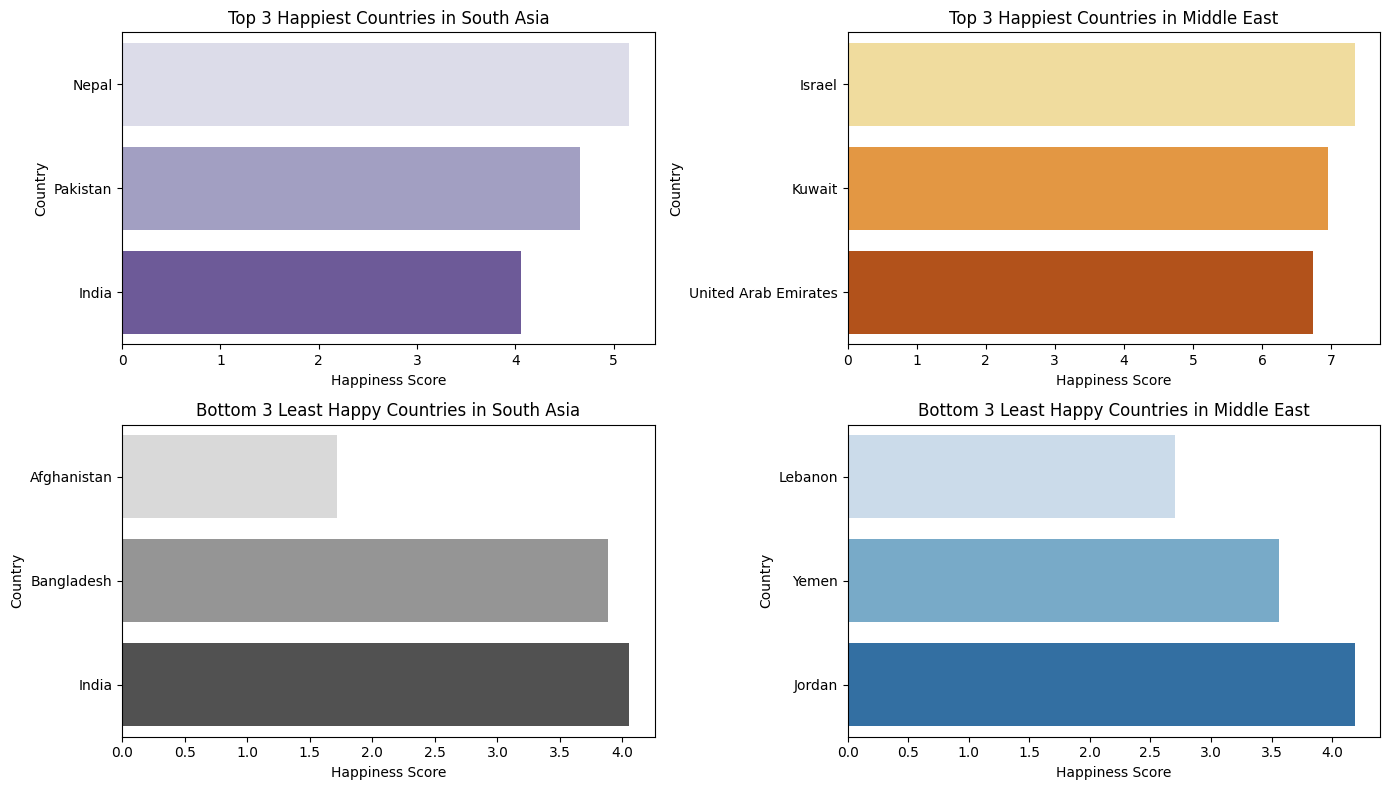

In [63]:
plt.figure(figsize=(14, 8))

# Top 3 happiest countries in South Asia
plt.subplot(2, 2, 1)
sns.barplot(x='score', y='Country name', data=top_3_south_asia, hue='Country name', palette='Purples', dodge=False, legend=False)
plt.title("Top 3 Happiest Countries in South Asia")
plt.xlabel("Happiness Score")
plt.ylabel("Country")

# Top 3 happiest countries in Middle East
plt.subplot(2, 2, 2)
sns.barplot(x='score', y='Country name', data=top_3_middle_east, hue='Country name', palette='YlOrBr', dodge=False, legend=False)
plt.title("Top 3 Happiest Countries in Middle East")
plt.xlabel("Happiness Score")
plt.ylabel("Country")

# Bottom 3 least happy countries in South Asia
plt.subplot(2, 2, 3)
sns.barplot(x='score', y='Country name', data=bottom_3_south_asia, hue='Country name', palette='Greys', dodge=False, legend=False)
plt.title("Bottom 3 Least Happy Countries in South Asia")
plt.xlabel("Happiness Score")
plt.ylabel("Country")

# Bottom 3 least happy countries in Middle East
plt.subplot(2, 2, 4)
sns.barplot(x='score', y='Country name', data=bottom_3_middle_east, hue='Country name', palette='Blues', dodge=False, legend=False)
plt.title("Bottom 3 Least Happy Countries in Middle East")
plt.xlabel("Happiness Score")
plt.ylabel("Country")

plt.tight_layout()
plt.show()


In [76]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({
    'South Asia': south_asia_means,
    'Middle East': middle_east_means
})

disparity = (middle_east_means - south_asia_means).abs()
largest_disparity_metric = disparity.idxmax()

print("Mean Values of Key Metrics by Region:")
print(comparison_df)

print("\nMetric with the largest disparity:")
print(f"{largest_disparity_metric} with a difference of {disparity[largest_disparity_metric]:.2f}")

Mean Values of Key Metrics by Region:
                         South Asia  Middle East
Log GDP per capita           0.9900     1.496333
Social support               0.4984     1.152778
Healthy life expectancy      0.3872     0.554111

Metric with the largest disparity:
Social support with a difference of 0.65


<Figure size 1000x600 with 0 Axes>

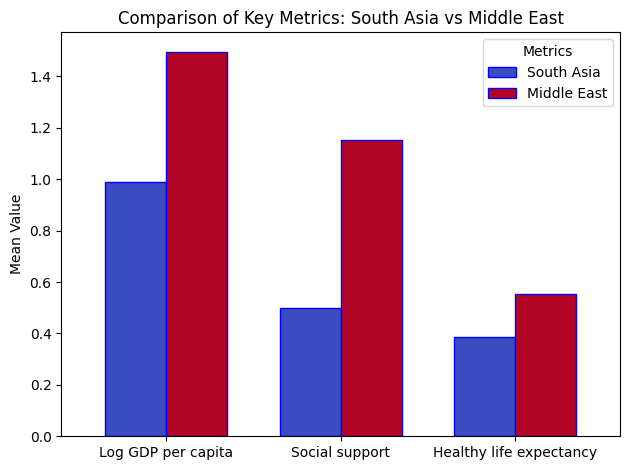

In [77]:
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', stacked=False, colormap='coolwarm', edgecolor='blue', width=0.7)
plt.title('Comparison of Key Metrics: South Asia vs Middle East')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [65]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({
    'South Asia': south_asia_means,
    'Middle East': middle_east_means
})

disparity = (middle_east_means - south_asia_means).abs()
largest_disparity_metric = disparity.idxmax()

print("Mean Values of Key Metrics by Region:")
print(comparison_df)

print("\nMetric with the largest disparity:")
print(f"{largest_disparity_metric} with a difference of {disparity[largest_disparity_metric]:.2f}")

Mean Values of Key Metrics by Region:
                         South Asia  Middle East
Log GDP per capita           0.9900     1.496333
Social support               0.4984     1.152778
Healthy life expectancy      0.3872     0.554111

Metric with the largest disparity:
Social support with a difference of 0.65


In [66]:
def coefficient_of_variation(data):
    return data.std() / data.mean()

south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = coefficient_of_variation(south_asia_df['score'])

middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = coefficient_of_variation(middle_east_df['score'])

print("Happiness Variability Metrics:")
print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.2f}")

Happiness Variability Metrics:
South Asia - Range: 3.44, Coefficient of Variation: 0.34
Middle East - Range: 4.63, Coefficient of Variation: 0.29


In [67]:
if south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness scores.")
else:
    print("\nMiddle East has greater variability in happiness scores.")


South Asia has greater variability in happiness scores.


In [68]:
sa_freedom_corr = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
sa_generosity_corr = south_asia_df['score'].corr(south_asia_df['Generosity'])

me_freedom_corr = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
me_generosity_corr = middle_east_df['score'].corr(middle_east_df['Generosity'])

print("Correlation of 'Score' with Freedom to Make Life Choices and Generosity:")
print(f"\nSouth Asia:")
print(f"Freedom to Make Life Choices: {sa_freedom_corr:.2f}")
print(f"Generosity: {sa_generosity_corr:.2f}")

print(f"\nMiddle East:")
print(f"Freedom to Make Life Choices: {me_freedom_corr:.2f}")
print(f"Generosity: {me_generosity_corr:.2f}")

Correlation of 'Score' with Freedom to Make Life Choices and Generosity:

South Asia:
Freedom to Make Life Choices: 0.80
Generosity: 0.88

Middle East:
Freedom to Make Life Choices: 0.86
Generosity: 0.63


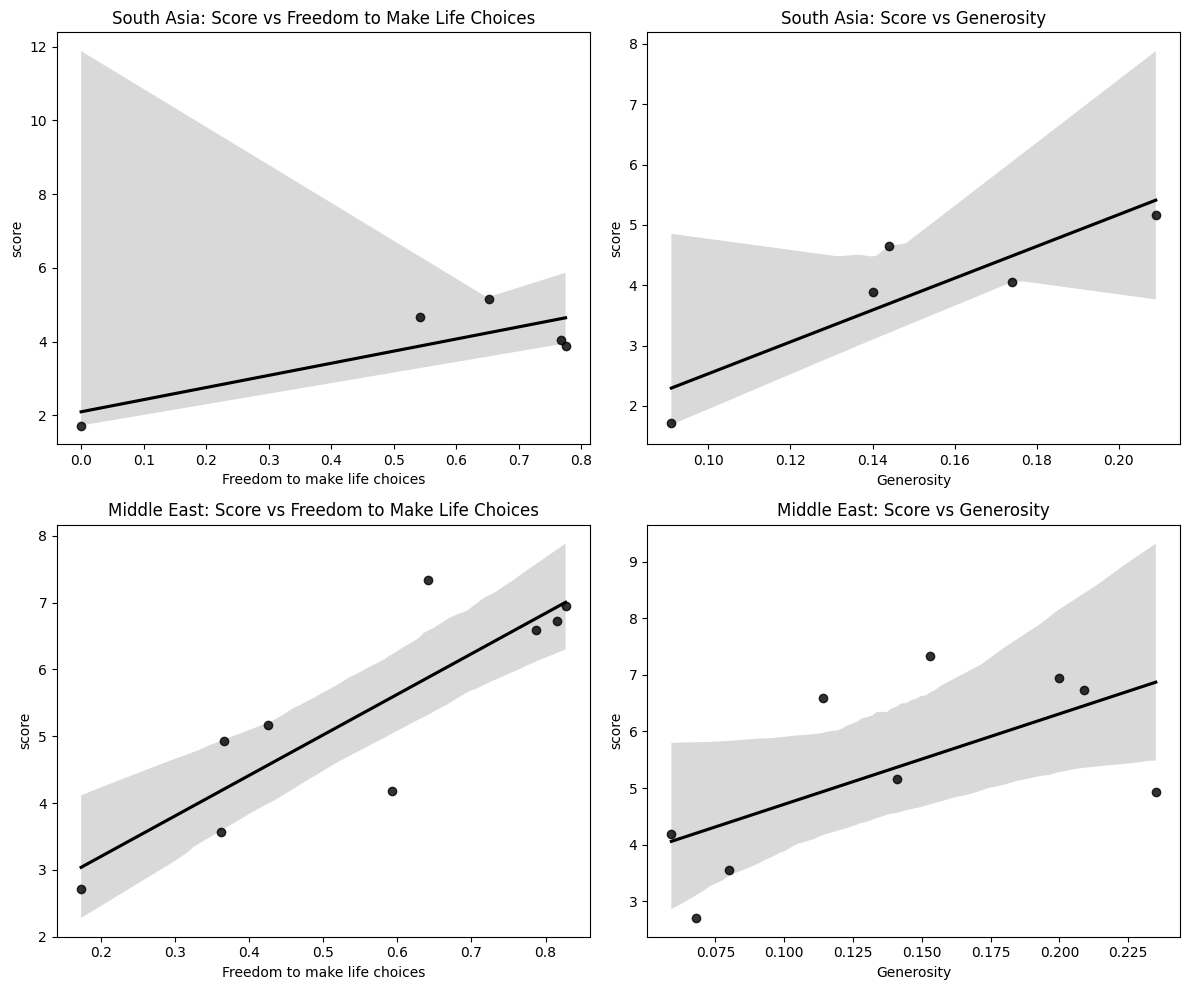

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, ax=axes[0, 0], color='black')
axes[0, 0].set_title("South Asia: Score vs Freedom to Make Life Choices")

sns.regplot(x='Generosity', y='score', data=south_asia_df, ax=axes[0, 1], color='black')
axes[0, 1].set_title("South Asia: Score vs Generosity")

sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, ax=axes[1, 0], color='black')
axes[1, 0].set_title("Middle East: Score vs Freedom to Make Life Choices")

sns.regplot(x='Generosity', y='score', data=middle_east_df, ax=axes[1, 1], color='black')
axes[1, 1].set_title("Middle East: Score vs Generosity")

plt.tight_layout()
plt.show()

In [70]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

sa_outliers_score = detect_outliers(south_asia_df, 'score')
sa_outliers_gdp = detect_outliers(south_asia_df, 'Log GDP per capita')

me_outliers_score = detect_outliers(middle_east_df, 'score')
me_outliers_gdp = detect_outliers(middle_east_df, 'Log GDP per capita')

sa_combined_outliers = pd.concat([sa_outliers_score, sa_outliers_gdp]).drop_duplicates()
me_combined_outliers = pd.concat([me_outliers_score, me_outliers_gdp]).drop_duplicates()

In [79]:
print("Outlier Countries in South Asia:")
print(sa_combined_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nOutlier Countries in the Middle East:")
print(me_combined_outliers[['Country name', 'score', 'Log GDP per capita']])

Outlier Countries in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Outlier Countries in the Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


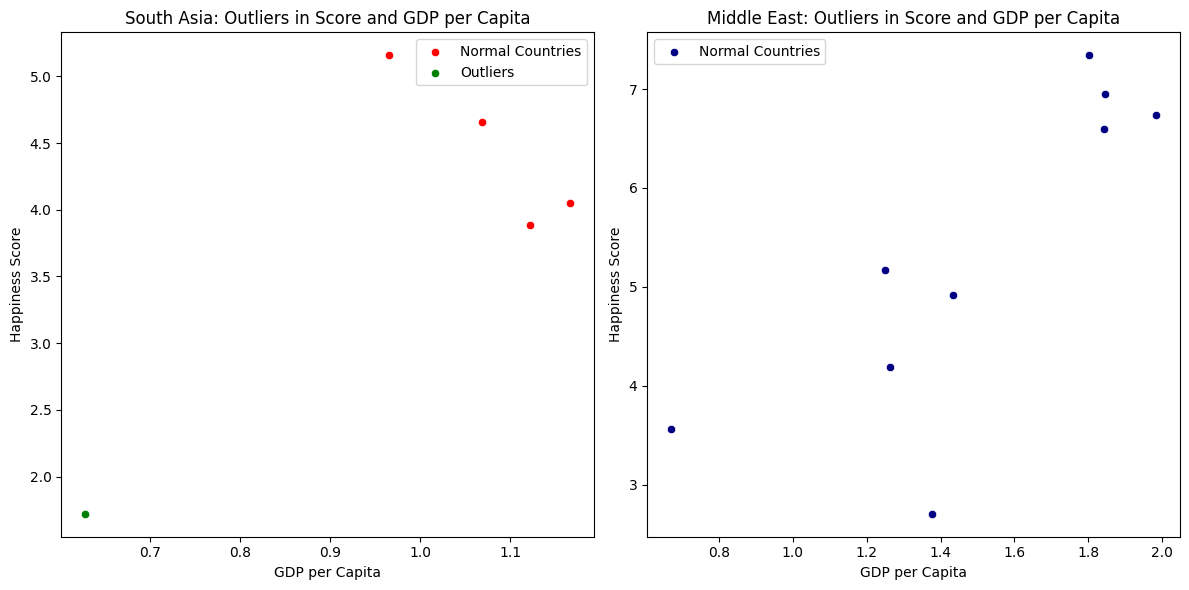

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='red', label='Normal Countries', ax=axes[0])
sns.scatterplot(x='Log GDP per capita', y='score', data=sa_combined_outliers, color='green', label='Outliers', ax=axes[0])
axes[0].set_title("South Asia: Outliers in Score and GDP per Capita")
axes[0].set_xlabel("GDP per Capita")
axes[0].set_ylabel("Happiness Score")

sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_df, color='navy', label='Normal Countries', ax=axes[1])
sns.scatterplot(x='Log GDP per capita', y='score', data=me_combined_outliers, color='orange', label='Outliers', ax=axes[1])
axes[1].set_title("Middle East: Outliers in Score and GDP per Capita")
axes[1].set_xlabel("GDP per Capita")
axes[1].set_ylabel("Happiness Score")

plt.tight_layout()
plt.show()

In [73]:
combined_df = pd.concat([
    south_asia_df.assign(Region="South Asia"),
    middle_east_df.assign(Region="Middle East")
])

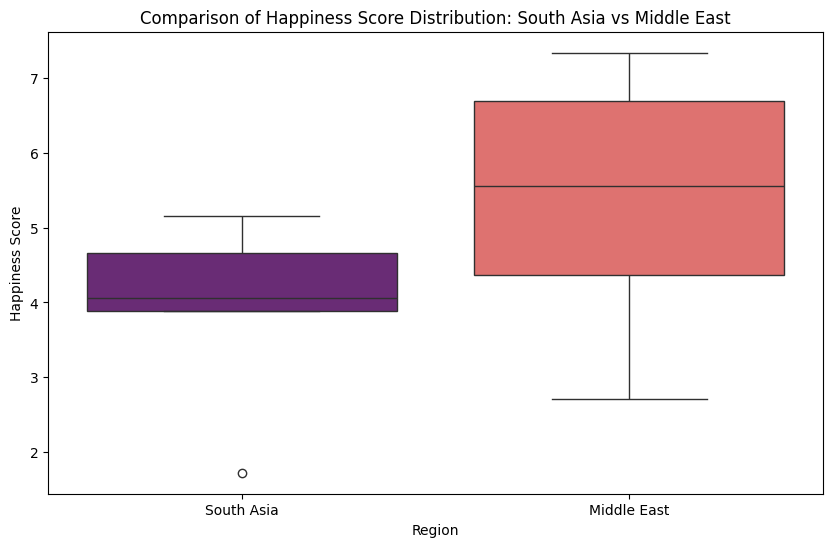

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df, hue='Region', palette='magma', dodge=False)

plt.title("Comparison of Happiness Score Distribution: South Asia vs Middle East")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.legend([], [], frameon=False)
plt.show()


In [75]:
print("Interpretation:")
print("\nKey Differences:")
print("Distribution Shape:")
print("South Asia: Generally, the distribution appears to be wider with more variance.")
print("Middle East: Tends to have a narrower distribution with less variance.")
print("\nMedian Values:")
print("South Asia: The median Score is relatively lower, indicating a more widespread variation among countries.")
print("Middle East: The median Score is higher, suggesting that scores are more concentrated around the average value.")
print("\nOutliers:")
print("South Asia: There are more outliers, indicating significant deviations from the typical happiness score.")
print("Middle East: Fewer outliers suggest a more uniform distribution among the countries.")

Interpretation:

Key Differences:
Distribution Shape:
South Asia: Generally, the distribution appears to be wider with more variance.
Middle East: Tends to have a narrower distribution with less variance.

Median Values:
South Asia: The median Score is relatively lower, indicating a more widespread variation among countries.
Middle East: The median Score is higher, suggesting that scores are more concentrated around the average value.

Outliers:
South Asia: There are more outliers, indicating significant deviations from the typical happiness score.
Middle East: Fewer outliers suggest a more uniform distribution among the countries.
